# EMLOpt
Master Thesis in Artificial Intelligence at University of Bologna, a.y. 2021/2022

Daniele Verì, Michele Lombardi, Andrea Borghesi, Stefano Teso


In [ ]:
!unzip eml-opt.zip
!pip install tensorflow-model-optimization tensorflow-addons==0.15.0 wandb
!mkdir eml-opt/dependencies/cplex
!wget https://api.wandb.ai/artifactsV2/gcp-us/veri/QXJ0aWZhY3Q6MjU1ODAzMjI=/69b1b89a73a7d0931fbfdb355eb147c3 -O eml-opt/dependencies/cplex/cplex_studio1210.linux-x86-64.bin
!wget https://api.wandb.ai/artifactsV2/gcp-us/veri/QXJ0aWZhY3Q6MjU1ODAzMjI=/97133b747b0114a4e3dba77ab26d68d5 -O eml-opt/dependencies/cplex/response.properties
!pip install docplex
!sh eml-opt/dependencies/cplex/cplex_studio1210.linux-x86-64.bin -f response.properties
!python3 /opt/ibm/ILOG/CPLEX_Studio1210/python/setup.py install

In [ ]:
import sys
sys.path.append("./eml-opt") 

%load_ext autoreload
%autoreload 2

In [ ]:
from problems.quantization.tpc import build_tpc, constraint_max_bits

tpc_obj = build_tpc()

In [ ]:
import numpy as np
from emlopt import surrogates, solvers
from emlopt.search_loop import SearchLoop
from emlopt.problem import build_problem
from emlopt.wandb import WandbContext

CONFIG = {
    "verbosity": 2,

    "iterations": 200,
    "starting_points": 2,

    "surrogate_model": {
        "type": surrogates.StopCI,
        "epochs": 999,
        "learning_rate": 5e-3,
        "weight_decay": 1e-4,
        "batch_size": None,
        "depth": 1,
        "width": 200,
        "ci_threshold": 5e-2,
    },

    "milp_model": {
        "type": solvers.IncrementalDist,
        "lambda_ucb": None,
        "solver_timeout": 120,
    }
}

problem = build_problem("tpc", tpc_obj, ["int"]*41, [[2, 8]]*41, constraint_max_bits)
search = SearchLoop(problem, CONFIG)

search.known_points = (np.expand_dims(np.array([4]*41), 0), -0.755)

wandb_cfg = WandbContext.get_defatult_cfg()
wandb_cfg['experiment_name'] = "TPC"

with WandbContext(wandb_cfg, search):
    search.run()

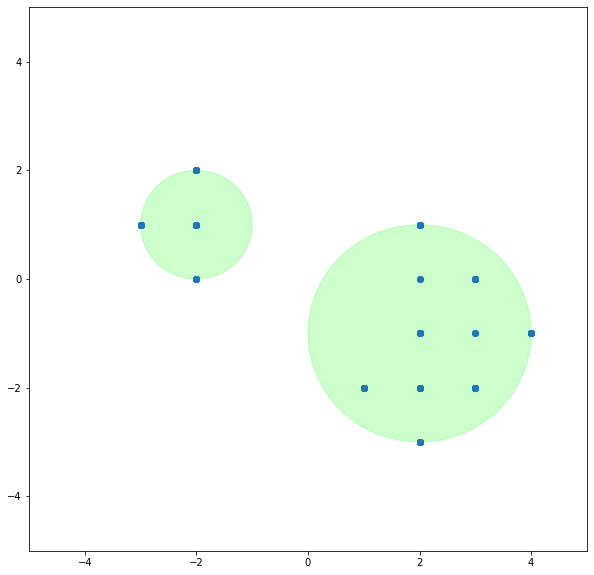

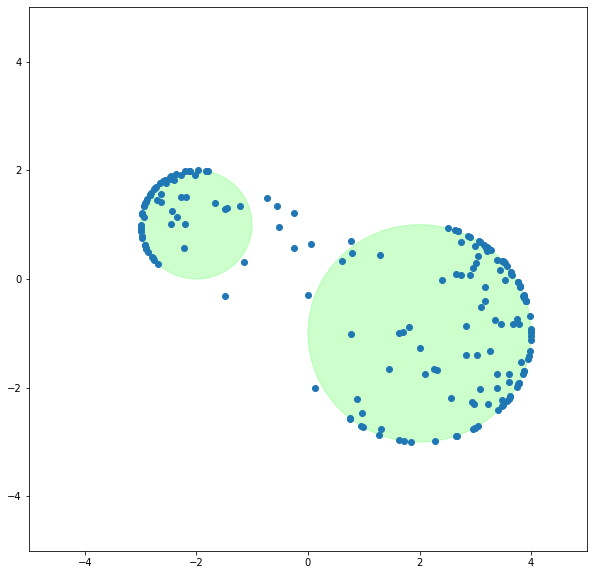

In [7]:
import sys
sys.path.append("..")
sys.path.append("../tests")
from init_test import InitTest

s=InitTest()
s.test_non_convex_integer_cplex()
s.test_non_convex_real_cplex()